## Ridge Classifier

Ridge regression is an extension to least squares which introduces an additional regularization parameter $\lambda \geq 0$. As such, the loss is given by:

\begin{align*}
    J_{\mathrm{Ridge}}(\textbf{w}) = \|X\textbf{w} - y\|^2 + \lambda \|\textbf{w}\|^2.
\end{align*}
The regularization parameter $\lambda$ is tasked to control the *generalization* to unseen data.

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import linear_model, svm

tf.random.set_seed(0)

In [20]:
img_height = 256
img_width = 256
image_dir = "images"
batch_size = None

train_ds, validation_ds = tf.keras.utils.image_dataset_from_directory(
  image_dir,
  validation_split=0.2,
  subset="both",
  seed = 0,
  batch_size = batch_size,
  crop_to_aspect_ratio=True,
  image_size=(img_height, img_width))


print(train_ds.cardinality(), validation_ds.cardinality())

Found 25064 files belonging to 2 classes.
Using 20052 files for training.
Using 5012 files for validation.
tf.Tensor(20052, shape=(), dtype=int64) tf.Tensor(5012, shape=(), dtype=int64)


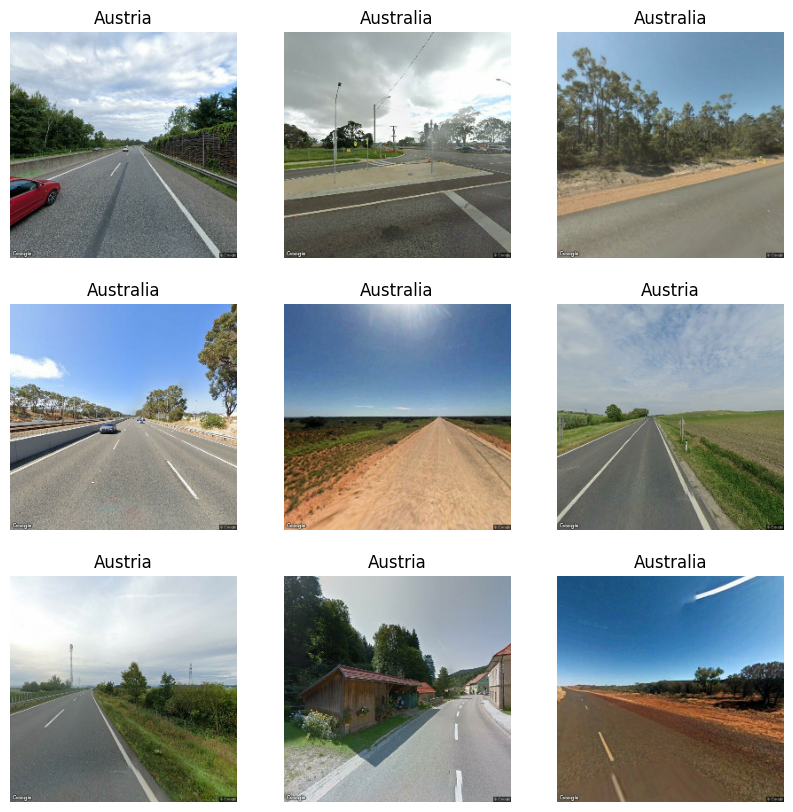

In [4]:
plt.figure(figsize=(10, 10))
i = 1
for image, label in train_ds.take(9):
  ax = plt.subplot(3, 3, i)
  plt.imshow(image.numpy().astype("uint8"))
  plt.title(train_ds.class_names[label])
  plt.axis("off")
  i += 1
plt.show()

In [41]:

alpha = 0.5
sample_size = 500
train_sample = train_ds.take(sample_size)
train_images = np.array([x for (x, y) in train_sample.as_numpy_iterator()]).reshape((sample_size,-1))
train_images = train_images/255
train_labels = np.array([y for (x, y) in train_sample.as_numpy_iterator()])


validation_sample = validation_ds.take(sample_size)
validation_images = np.array([x for (x, y) in validation_sample.as_numpy_iterator()]).reshape((sample_size,-1))
validation_images = validation_images/255
validation_labels = np.array([y for (x, y) in validation_sample.as_numpy_iterator()])

def evaluate_regressor(regressor):
    regressor.fit(train_images, train_labels)
    predicted_labels = regressor.predict(validation_images)
    prediction_results = (predicted_labels == validation_labels) 
    print(f"{sum(prediction_results)} out of {len(prediction_results)} correctly classified.")
    accuracy = sum(prediction_results)/len(prediction_results)
    print(f"Accuracy: {accuracy}")

In [42]:
ridge_classifier = linear_model.RidgeClassifier(alpha = alpha)
evaluate_regressor(ridge_classifier)


241 out of 500 correctly classified.
Accuracy: 0.482


In [43]:
logistic_regressor = linear_model.LogisticRegression()
evaluate_regressor(logistic_regressor)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


239 out of 500 correctly classified.
Accuracy: 0.478


In [46]:
svc = svm.LinearSVC()
evaluate_regressor(svc)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


244 out of 500 correctly classified.
Accuracy: 0.488
